In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel("/content/Combiner Current Dataset for M&D Analyst Job Posting.xlsx")

In [3]:
data.head()

,Name,2024-01-27 00:00:00,2024-01-27 01:00:00,2024-01-27 02:00:00,2024-01-27 03:00:00,2024-01-27 04:00:00,2024-01-27 05:00:00,2024-01-27 06:00:00,2024-01-27 07:00:00,2024-01-27 08:00:00,...,2024-01-27 15:00:00,2024-01-27 16:00:00,2024-01-27 17:00:00,2024-01-27 18:00:00,2024-01-27 19:00:00,2024-01-27 20:00:00,2024-01-27 21:00:00,2024-01-27 22:00:00,2024-01-27 23:00:00,2024-01-28 00:00:00
0,EPS-01-001-INV1M1-CMB01-A,0.348012,0.322871,0.280381,0.267148,0.250834,0.230205,0.189758,0.148809,7.334945,...,120.319138,117.637878,92.398911,10.382317,0.924100,0.880618,0.727429,0.742277,0.678229,0.585434
1,EPS-01-001-INV1M1-CMB02-A,0.662346,0.634387,0.588710,0.576586,0.540467,0.528456,0.473807,0.424196,-0.012022,...,87.867287,66.114975,39.299149,6.491416,1.095071,1.069347,1.006440,0.981865,0.925647,0.865142
2,EPS-01-001-INV1M1-CMB03-A,1.923815,1.861510,1.843754,1.800951,1.775561,1.746516,1.716158,1.686395,6.563704,...,157.350769,152.561554,118.132607,12.000229,2.419197,2.380105,2.332520,2.279927,2.174840,2.111250
3,EPS-01-001-INV1M1-CMB04-A,-886.466614,-885.629822,-885.849487,-885.357178,-885.400818,-884.955750,-884.164001,-883.362000,-886.090942,...,-882.466125,-880.106262,-881.087158,-884.761963,-884.222351,-885.549377,-886.258911,-886.183167,-886.234863,-886.266663
4,EPS-01-001-INV1M1-CMB05-A,0.754365,0.717859,0.681653,0.662992,0.636699,0.598076,0.546365,0.505384,3.949968,...,148.078903,137.630188,104.147675,10.230651,1.256168,1.123320,1.052323,0.984866,0.917474,0.872349


In [4]:
# Check for missing values
missing_values = data.isnull().sum().sum()

# Check for duplicate entries
duplicate_entries = data.duplicated().sum()

# Summary statistics for initial understanding
summary_stats = data.describe()

missing_values, duplicate_entries, summary_stats


(0,
 0,
        2024-01-27 00:00:00  2024-01-27 01:00:00  2024-01-27 02:00:00  \
 count           726.000000           726.000000           726.000000   
 mean             -4.522745            -4.529828            -4.566023   
 std              71.717532            71.875213            71.940013   
 min            -960.085815          -962.104370          -963.657959   
 25%              -0.188924            -0.204826            -0.217800   
 50%               0.467328             0.452869             0.446794   
 75%               1.207937             1.192450             1.177706   
 max             469.357422           482.486908           486.169861   
 
        2024-01-27 03:00:00  2024-01-27 04:00:00  2024-01-27 05:00:00  \
 count           726.000000           726.000000           726.000000   
 mean             -4.560224            -4.577944            -4.588619   
 std              72.061983            72.106184            72.098162   
 min            -964.876465          -965

In [5]:
# Now that we have correct understanding of column names, let's create a line plot
# to visualize the daily current profile for a few randomly selected combiners
# This visualization will help us understand the pattern of current output over the course of a day
import plotly.graph_objects as go
# Selecting a few random combiners for visualization
sample_combiners = data.sample(n=10, random_state=1)

# Convert columns to datetime format for plotting
time_columns = data.columns[1:]
time_columns_dt = pd.to_datetime(time_columns)

# Create line plot for each selected combiner
fig = go.Figure()

for index, row in sample_combiners.iterrows():
    fig.add_trace(go.Scatter(x=time_columns_dt, y=row[1:], mode='lines+markers', name=row['Name']))

# Update layout
fig.update_layout(title='Daily Current Profile for Selected Combiners',
                  xaxis_title='Time',
                  yaxis_title='Current (A)',
                  xaxis=dict(tickformat='%H:%M'),
                  template='plotly_white')

fig.show()


In [6]:
# Now that we have correct understanding of column names, let's create a line plot
# to visualize the daily current profile for a few randomly selected combiners
# This visualization will help us understand the pattern of current output over the course of a day

# Selecting a few random combiners for visualization
sample_combiners = data.sample(n=5, random_state=1)

# Convert columns to datetime format for plotting
time_columns = data.columns[1:]
time_columns_dt = pd.to_datetime(time_columns)

# Create line plot for each selected combiner
fig = go.Figure()

for index, row in sample_combiners.iterrows():
    fig.add_trace(go.Scatter(x=time_columns_dt, y=row[1:], mode='lines+markers', name=row['Name']))

# Update layout
fig.update_layout(title='Daily Current Profile for Selected Combiners',
                  xaxis_title='Time',
                  yaxis_title='Current (A)',
                  xaxis=dict(tickformat='%H:%M'),
                  template='plotly_white')

fig.show()


In [8]:
import numpy as np
from scipy.signal import find_peaks

# Function to detect double hump pattern in the daily current profile
def detect_double_hump(current_values):
    # Find peaks (humps) in the current profile
    peaks, _ = find_peaks(current_values, distance=20) # distance ensures peaks are not too close to each other

    # Check for double hump pattern: Ideally, two significant peaks during daylight hours
    if len(peaks) == 2:
        return True
    else:
        return False

# Apply the function to each combiner and store the result
data['Double_Hump'] = data.apply(lambda x: detect_double_hump(x[1:]), axis=1)

# Example of how many combiners show a double hump pattern
double_hump_summary = data['Double_Hump'].value_counts()

double_hump_summary

False    725
True       1
Name: Double_Hump, dtype: int64

In [9]:
from scipy.signal import find_peaks, peak_prominences

# Define a function to categorize the combiners based on their current profiles
def categorize_combiner(current_values):
    # Parameters for peak detection
    height_threshold = np.max(current_values) * 0.25  # Peaks must be at least 25% of the max height
    distance_between_peaks = 50  # Minimum distance between peaks to consider them separate

    # Find peaks
    peaks, properties = find_peaks(current_values, height=height_threshold, distance=distance_between_peaks)
    prominences = peak_prominences(current_values, peaks)[0]

    # Criteria for categorization
    if len(peaks) == 2 and all(prom > np.mean(prominences) for prom in prominences):
        return "Working Trackers"
    elif len(peaks) == 1:
        # Determine the position of the single peak to categorize further
        if peaks[0] < len(current_values) / 3:
            return "Non-Working Trackers: Skewed Left"
        elif peaks[0] > 2 * len(current_values) / 3:
            return "Non-Working Trackers: Skewed Right"
        else:
            return "Non-Working Trackers: Single Middle Hump"
    elif np.max(current_values) < np.mean(current_values) * 0.1:  # Very low or zero current
        return "Low to Zero Current"
    else:
        return "Erratic Data"

# Apply the categorization function to each combiner
data['Category'] = data.apply(lambda x: categorize_combiner(x[1:]), axis=1)

# Summary of categorization
category_summary = data['Category'].value_counts()

category_summary


Non-Working Trackers: Single Middle Hump    698
Erratic Data                                 13
Non-Working Trackers: Skewed Right            9
Non-Working Trackers: Skewed Left             6
Name: Category, dtype: int64

In [10]:
import plotly.express as px

# Assuming you have the data and the necessary imports
# Create a bar chart
fig = px.bar(data, x='Category', title='Categorization of Combiners Based on Current Profiles',
             color='Category', color_discrete_sequence=px.colors.qualitative.Safe)

# Update layout
fig.update_layout(xaxis_title="Category", yaxis_title="Count", showlegend=True)

# Show the chart
fig.show()


In [14]:
# First, we need to recalculate the average current for each combiner
# We will assume each row in the original dataset represents a unique combiner and calculate the average across all time points
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
# Re-load the original dataset
data_original = pd.read_excel("/content/Combiner Current Dataset for M&D Analyst Job Posting.xlsx")

# Calculate the average current for each combiner
data_original['Average_Current'] = data_original.iloc[:, 1:].mean(axis=1)

# Now we have a dataframe with an 'Average_Current' column, which we can use for anomaly detection
combiner_data_for_analysis = data_original[['Name', 'Average_Current']]

# Reset index for plotting purposes
combiner_data_for_analysis = combiner_data_for_analysis.reset_index()

# Implement the three anomaly detection algorithms on the 'Average_Current'
# The features matrix needs to be 2D for scikit-learn
X_combiner = combiner_data_for_analysis[['Average_Current']].values

# Isolation Forest
iso_forest_combiner = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
combiner_data_for_analysis['anomaly_iso_forest'] = iso_forest_combiner.fit_predict(X_combiner)

# Local Outlier Factor
lof_combiner = LocalOutlierFactor(n_neighbors=20, contamination='auto')
combiner_data_for_analysis['anomaly_lof'] = lof_combiner.fit_predict(X_combiner)

# One-Class SVM
oc_svm_combiner = OneClassSVM(kernel='rbf', gamma='auto', nu=0.05)
combiner_data_for_analysis['anomaly_ocsvm'] = oc_svm_combiner.fit_predict(X_combiner)

# Visualizations and accuracy will be computed after this cell
combiner_data_for_analysis.head()


,index,Name,Average_Current,anomaly_iso_forest,anomaly_lof,anomaly_ocsvm
0,0,EPS-01-001-INV1M1-CMB01-A,40.397517,1,1,1
1,1,EPS-01-001-INV1M1-CMB02-A,31.803206,1,1,1
2,2,EPS-01-001-INV1M1-CMB03-A,53.394041,1,1,1
3,3,EPS-01-001-INV1M1-CMB04-A,-884.528950,-1,-1,1
4,4,EPS-01-001-INV1M1-CMB05-A,43.053149,1,1,1


In [23]:
def plot_anomalies(data, anomaly_column, title):
    plt.figure(figsize=(10, 5))

    # Separate the data into normal and anomaly subsets
    normal_data = data[data[anomaly_column] != -1]
    anomaly_data = data[data[anomaly_column] == -1]

    # Plot normal data points
    plt.scatter(normal_data.index, normal_data['Average_Current'],
                color='blue', marker='o', s=10, label='Normal Data')

    # Plot anomalies
    plt.scatter(anomaly_data.index, anomaly_data['Average_Current'],
                color='red', marker='*', s=10, label='Anomalies')

    plt.title(title)
    plt.xlabel('Index of Combiners')
    plt.ylabel('Average Current')
    plt.legend()
    plt.show()

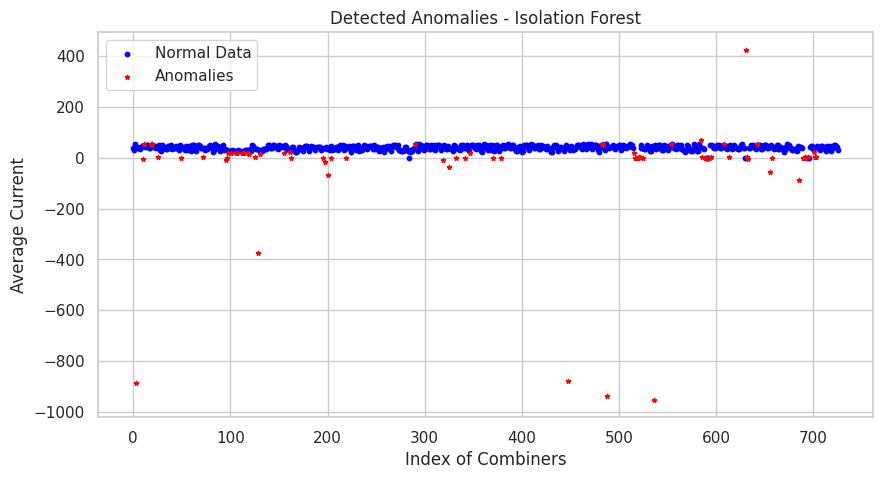

In [24]:
plot_anomalies(combiner_data_for_analysis, 'anomaly_iso_forest', 'Detected Anomalies - Isolation Forest')

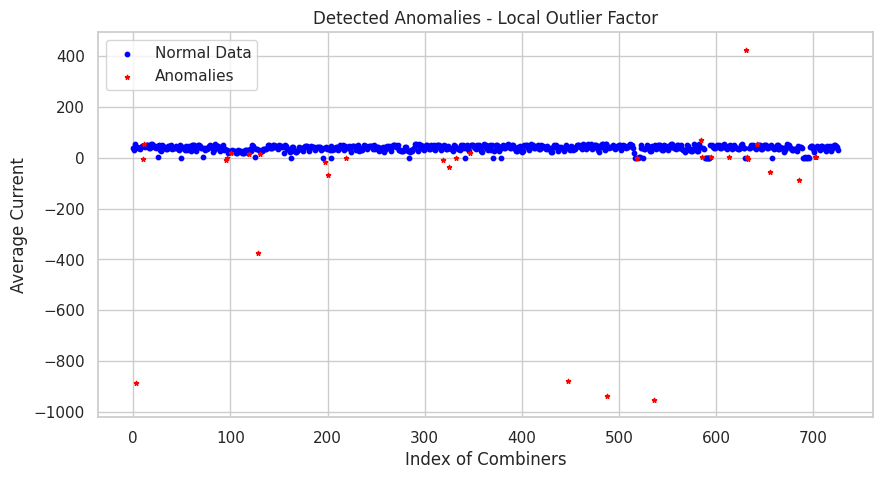

In [26]:
# Visualize the detected anomalies for Local Outlier Factor
plot_anomalies(combiner_data_for_analysis, 'anomaly_lof', 'Detected Anomalies - Local Outlier Factor')


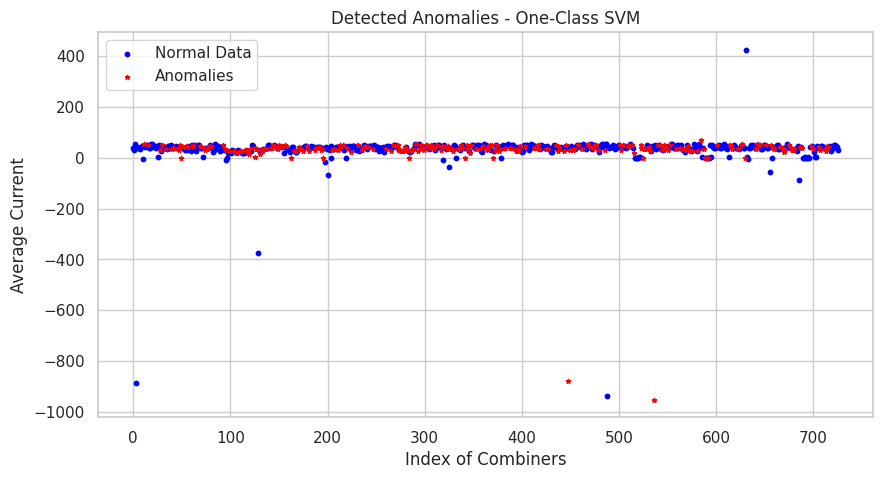

In [27]:
# Visualize the detected anomalies for One-Class SVM
plot_anomalies(combiner_data_for_analysis, 'anomaly_ocsvm', 'Detected Anomalies - One-Class SVM')


In [35]:
combiner_data_for_analysis["anomaly_iso_forest"].value_counts()

 1    651
-1     75
Name: anomaly_iso_forest, dtype: int64

In [34]:
combiner_data_for_analysis["anomaly_ocsvm"].value_counts()

 1    477
-1    249
Name: anomaly_ocsvm, dtype: int64

In [33]:
combiner_data_for_analysis["anomaly_lof"].value_counts()

 1    694
-1     32
Name: anomaly_lof, dtype: int64